In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [138]:
import io

In [139]:
from google.colab import files
uploaded = files.upload()

Saving vnet.csv to vnet.csv


In [140]:
df = pd.read_csv(io.BytesIO(uploaded['vnet.csv']))
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0     4/25/2011  19.400000  19.500000  17.320000  17.750000  17.750000   
1     4/26/2011  17.700001  18.709999  17.400000  17.559999  17.559999   
2     4/27/2011  17.840000  17.840000  15.800000  16.250000  16.250000   
3     4/28/2011  16.110001  16.780001  15.700000  16.030001  16.030001   
4     4/29/2011  15.950000  16.420000  15.300000  15.510000  15.510000   
...         ...        ...        ...        ...        ...        ...   
2306  6/23/2020  22.420000  24.580000  21.200001  23.750000  23.750000   
2307  6/24/2020  23.190001  23.240000  21.809999  22.209999  22.209999   
2308  6/25/2020  22.500000  24.480000  21.930000  24.270000  24.270000   
2309  6/26/2020  24.350000  24.680000  23.180000  24.559999  24.559999   
2310  6/29/2020  24.440001  25.230000  24.250000  24.790001  24.790001   

        Average  
0     18.344000  
1     17.786000  
2     16.796000  
3     16.130001  
4     15.738000  
...

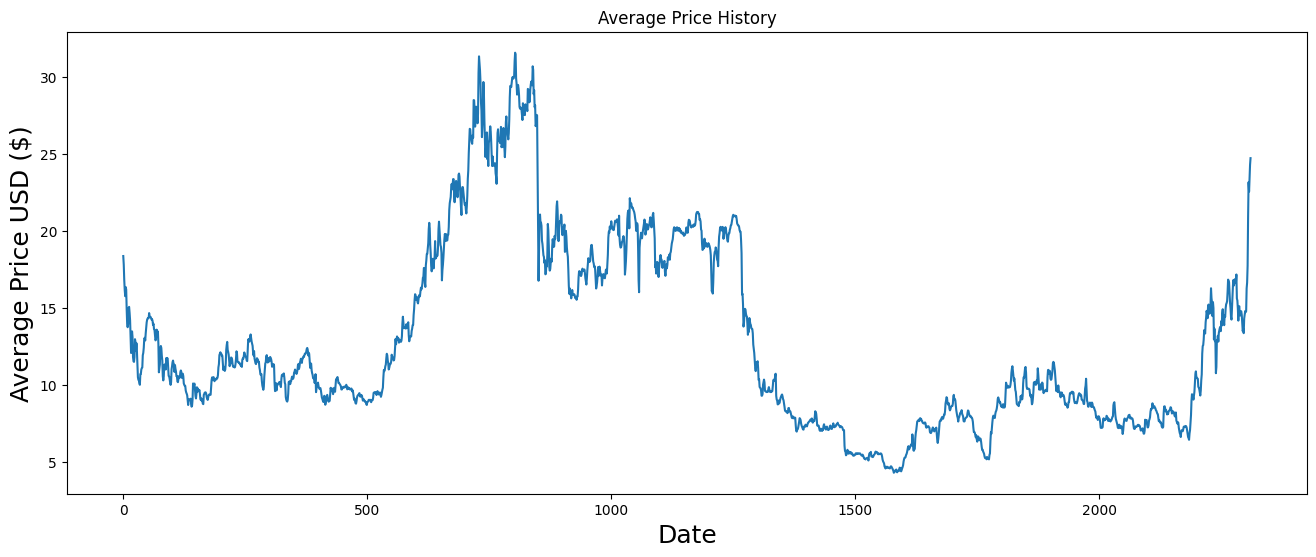

In [141]:
plt.figure(figsize=(16,6))
plt.title('Average Price History')
plt.plot(df['Average'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.show()

In [142]:
data = df.filter(['Average'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.95 ))
window_size = 60
training_data_len

2196

In [143]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
print('scaled_data.shape', len(dataset))
scaled_data

scaled_data.shape 2311


array([[0.91765675],
       [0.82492048],
       [0.66038858],
       ...,
       [1.7728906 ],
       [1.90185701],
       [1.97398533]])

In [145]:
train_data = scaled_data[0: int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= window_size + 1:
      print('x_train', x_train)
      print('\n y_train', y_train)
      print()

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('x_train.shape', x_train.shape)

x_train [array([ 0.91765675,  0.82492048,  0.66038858,  0.54970357,  0.48455542,
        0.58260983,  0.55635119,  0.34295821,  0.18374445,  0.1495085 ,
        0.18706833,  0.35858044,  0.36921685,  0.30340406,  0.22130427,
        0.03882336, -0.12836771,  0.00525219,  0.10430376,  0.04214724,
       -0.17157813, -0.2187772 , -0.22442779, -0.17390484,  0.02020964,
       -0.00771094, -0.10443579, -0.02266839, -0.11208071, -0.24636539,
       -0.38962454, -0.41820989, -0.42452526, -0.45277822, -0.47172433,
       -0.35738292, -0.35572098, -0.30752475, -0.29157013, -0.28558715,
       -0.15263202, -0.12803533, -0.07252656,  0.02552785,  0.03549948,
        0.00658174,  0.08436049,  0.14020164,  0.20302294,  0.23260546,
        0.24390664,  0.24856007,  0.24656574,  0.30174212,  0.2668414 ,
        0.26285275,  0.26052603,  0.2478953 ,  0.23094352,  0.23559695])]

 y_train [0.21864516799131148]

x_train [array([ 0.91765675,  0.82492048,  0.66038858,  0.54970357,  0.48455542,
        0.5

In [146]:
print(x_train.shape[1])

60


In [147]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
!pip install layers

In [148]:
import tensorflow as tf

In [149]:
def build_lstm_model():
  input = tf.keras.layers.Input(shape = (x_train.shape[1], 1), name = 'input')
  x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences = True))(input)
  x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences = False, dropout = 0.5))(x)
  output = tf.keras.layers.Dense(1, name = "last_dense")(x)
  model = tf.keras.Model(inputs = input, outputs = output)
  return model

LSTM_model = build_lstm_model()
LSTM_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_14 (Bidirect  (None, 60, 256)           133120    
 ional)                                                          
                                                                 
 bidirectional_15 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 last_dense (Dense)          (None, 1)                 129       
                                                                 
Total params: 297601 (1.14 MB)
Trainable params: 297601 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
epochs = 50
batch_size = 32
early_stopping_patience = 20

LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
price = LSTM_model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/50
67/67 [==============================] - 46s 278ms/step - loss: 0.0761
Epoch 2/50
67/67 [==============================] - 19s 285ms/step - loss: 0.0182
Epoch 3/50
67/67 [==============================] - 18s 269ms/step - loss: 0.0186
Epoch 4/50
67/67 [==============================] - 19s 287ms/step - loss: 0.0142
Epoch 5/50
67/67 [==============================] - 18s 272ms/step - loss: 0.0142
Epoch 6/50
67/67 [==============================] - 20s 305ms/step - loss: 0.0136
Epoch 7/50
67/67 [==============================] - 18s 269ms/step - loss: 0.0122
Epoch 8/50
67/67 [==============================] - 19s 286ms/step - loss: 0.0125
Epoch 9/50
67/67 [==============================] - 18s 270ms/step - loss: 0.0127
Epoch 10/50
67/67 [==============================] - 19s 288ms/step - loss: 0.0113
Epoch 11/50
67/67 [==============================] - 18s 274ms/step - loss: 0.0110
Epoch 12/50
67/67 [==============================] - 19s 288ms/step - loss: 0.0112
Epoch 13/50
6

In [152]:
test_data = scaled_data[training_data_len - window_size: ]
print('len(test_data): ', len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i - window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = LSTM_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data):  175
4/4 [==============================] - 0s 63ms/step


0.7854924084881709

<ipython-input-153-8f188311654f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


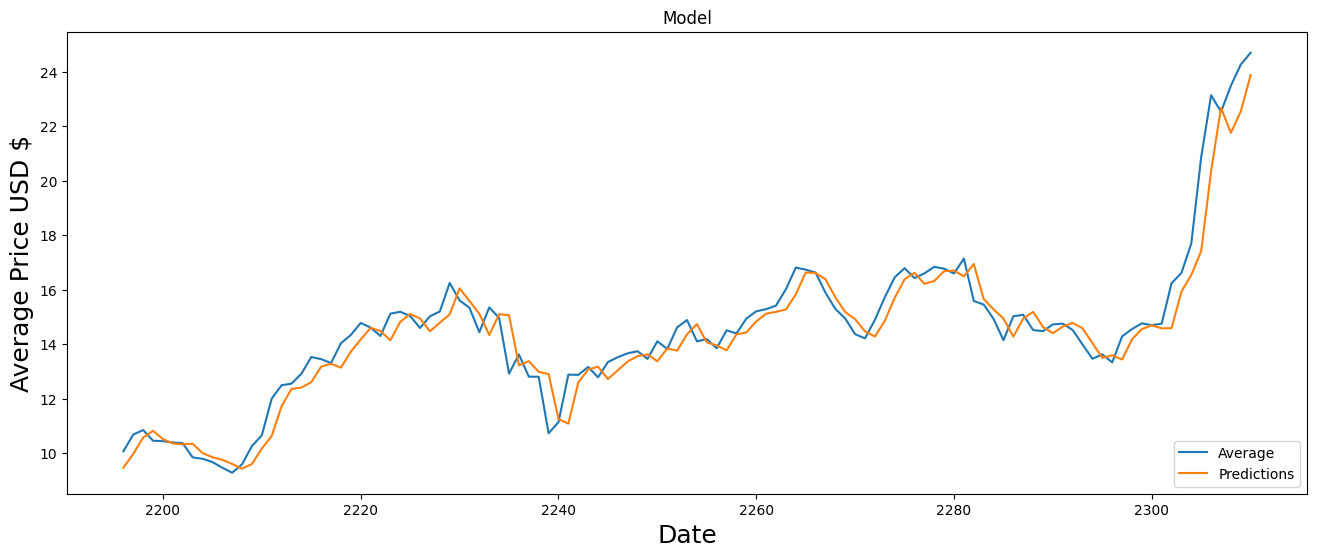

In [153]:
train = data[: training_data_len]
test = data[training_data_len: ]
test['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Average Price USD $', fontsize = 18)
plt.plot(test[['Average', 'Predictions']])
plt.legend(['Average', 'Predictions'], loc = 'lower right')
plt.show()

In [154]:
test[:]

,Average,Predictions
2196,10.076000,9.473856
2197,10.690000,9.979091
2198,10.854000,10.577182
2199,10.462000,10.827393
2200,10.446000,10.520408
...,...,...
2306,23.140000,20.360033
2307,22.532000,22.678165
2308,23.490000,21.759769
2309,24.266000,22.548981
